### EDA

   Unnamed: 0                        Time Stamp  SRC_Cell  CRNTI  SRC_RSRP  \
0          36   9-4-2020 01:36:13.437716091 GMT         1    169        46   
1          38   9-4-2020 01:36:42.673279894 GMT         1   1637        32   
2          39   9-4-2020 01:37:04.170689522 GMT         1   1630        36   
3          48   9-4-2020 01:38:53.175025919 GMT         1   1610        41   
4          50   9-4-2020 01:39:36.622873617 GMT         1   1629        50   

   SRC_RSRQ  TargetPCI  TargetEARFCN  TargetRSRP  HOType  HOStatus  DiffRSRP  
0         8        266          1405          45       2     False        -1  
1         0        102          1405          39       2     False         7  
2         1        215          1405          41       2      True         5  
3         1         47          1405          45       2      True         4  
4         2        215          1405          56       2      True         6  
Unnamed: 0      0
Time Stamp      0
SRC_Cell        0
CRN

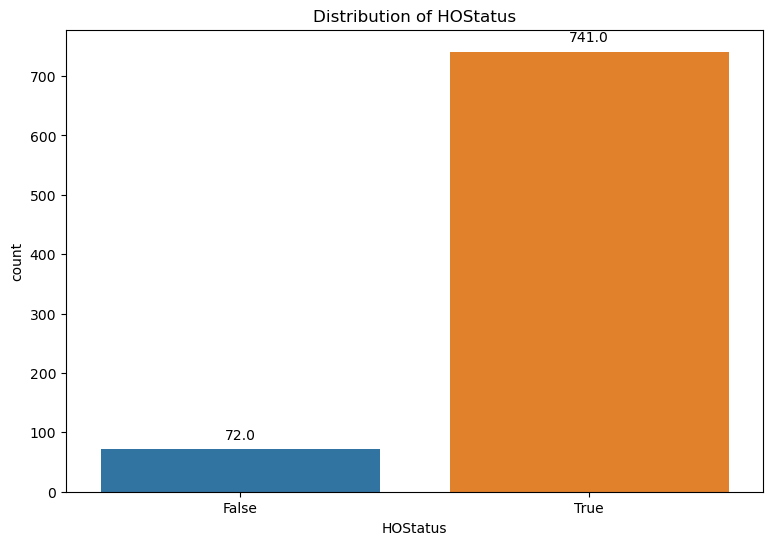

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV file into a DataFrame
df = pd.read_excel('TrainSite2147.xlsx')

# Display the first few rows of the DataFrame
print(df.head(5))

# Check for missing values
print(df.isnull().sum())

# # Summary statistics
# print(df.describe())

# Distribution of the target variable HOStatus
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='HOStatus', data=df, linewidth=0.5)
#sns.countplot(x='HOStatus', data=df)
plt.title('Distribution of HOStatus')

# Add count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

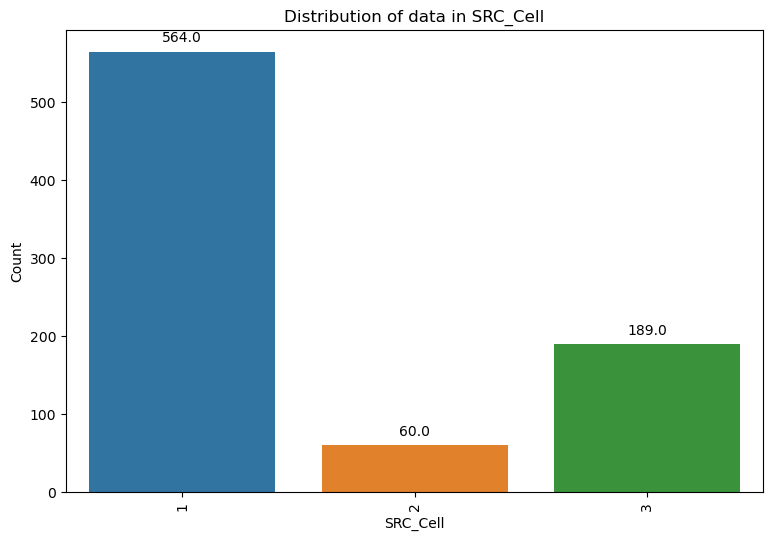

In [22]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='SRC_Cell', data=df,linewidth=0.5)
plt.title('Distribution of data in SRC_Cell')
plt.xlabel('SRC_Cell')
plt.ylabel('Count')
plt.xticks(rotation=90)
# Add count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



### Cell Edge & Ultra Cell edge Conditions:
Number of users present in each cell & their percentage at ultra cell edge conditions:

Number of users present in each cell & their % at ultra cell edge conditions:
No of users in Cell 1 564, below 40 RSRP 174  & the percentage of user at cell edge 30.85%
No of users in Cell 2 60, below 40 RSRP 0  & the percentage of user at cell edge 0.00%
No of users in Cell 3 189, below 40 RSRP 3  & the percentage of user at cell edge 1.59%


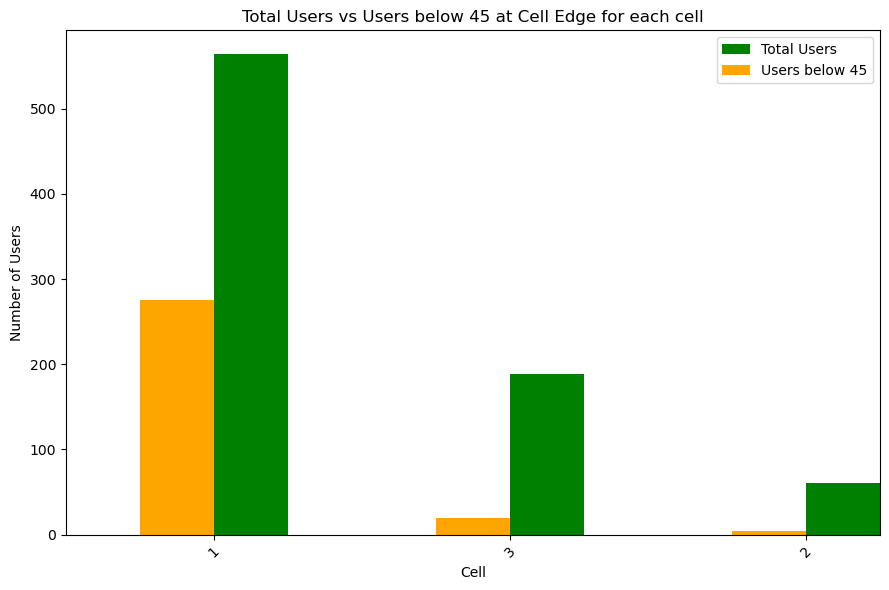

In [24]:
# Filter the DataFrame for each cell type
cell1_users = df[df['SRC_Cell'] == 1]
cell2_users = df[df['SRC_Cell'] == 2]
cell3_users = df[df['SRC_Cell'] == 3]

# Filter the DataFrame for users with SRC_RSRP below 40 in Cell_1
cell1_users_below_40 = df[(df['SRC_Cell'] == 1) & (df['SRC_RSRP'] < 40)]
cell2_users_below_40 = df[(df['SRC_Cell'] == 2) & (df['SRC_RSRP'] < 40)]
cell3_users_below_40 = df[(df['SRC_Cell'] == 3) & (df['SRC_RSRP'] < 40)]


# Count the number of users in each cell type
num_cell1_users = cell1_users.shape[0]
num_cell2_users = cell2_users.shape[0]
num_cell3_users = cell3_users.shape[0]


# Count the number of users with SRC_RSRP below 40 in Cell_1
num_users_below_40_cell1 = cell1_users_below_40.shape[0]
num_users_below_40_cell2 = cell2_users_below_40.shape[0]
num_users_below_40_cell3 = cell3_users_below_40.shape[0]


# Calculate the percentage of users below 40 in Cell_1
percentage_users_below_40_cell1 = (num_users_below_40_cell1 / num_cell1_users) * 100
percentage_users_below_40_cell2 = (num_users_below_40_cell2 / num_cell2_users) * 100
percentage_users_below_40_cell3 = (num_users_below_40_cell3 / num_cell3_users) * 100


# Display the number of users in each cell type
print("Number of users present in each cell & their % at ultra cell edge conditions:")
print(f"No of users in Cell 1 {num_cell1_users}, below 40 RSRP {num_users_below_40_cell1}  & the percentage of user at cell edge {percentage_users_below_40_cell1:.2f}%")
print(f"No of users in Cell 2 {num_cell2_users}, below 40 RSRP {num_users_below_40_cell2}  & the percentage of user at cell edge {percentage_users_below_40_cell2:.2f}%")
print(f"No of users in Cell 3 {num_cell3_users}, below 40 RSRP {num_users_below_40_cell3}  & the percentage of user at cell edge {percentage_users_below_40_cell3:.2f}%")


# Calculate the total number of users for each cell
total_users_per_cell = df['SRC_Cell'].value_counts()

# Calculate the number of users at the cell edge for each cell
users_below_45_per_cell = df[df['SRC_RSRP'] < 45]['SRC_Cell'].value_counts()

# Plot the graph
plt.figure(figsize=(9, 6))
total_users_per_cell.plot(kind='bar', color='green', position=0, width=0.25, label='Total Users')
users_below_45_per_cell.plot(kind='bar', color='orange', position=1, width=0.25, label='Users below 45')
plt.title('Total Users vs Users below 45 at Cell Edge for each cell')
plt.xlabel('Cell')
plt.ylabel('Number of Users')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


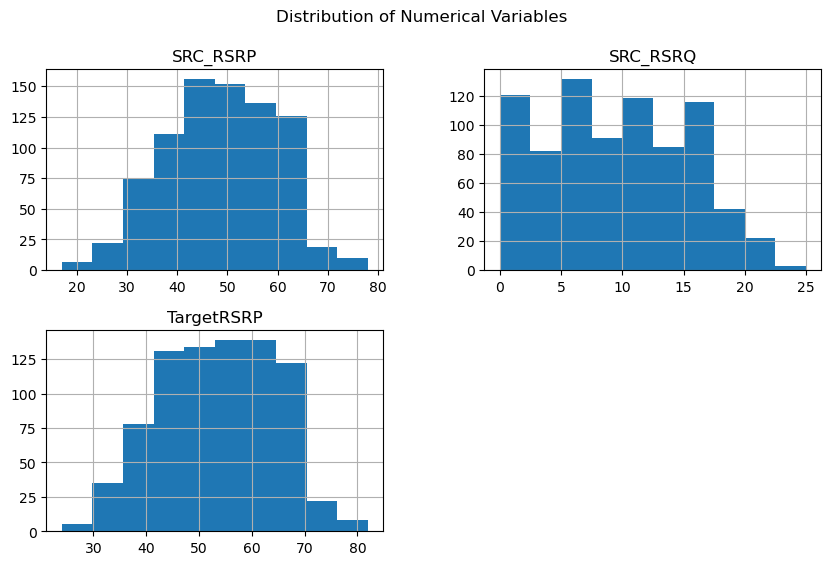

In [100]:
# Distribution of numerical variables
numerical_cols = ['SRC_RSRP', 'SRC_RSRQ', 'TargetRSRP']
df[numerical_cols].hist(figsize=(10, 6))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

c:\Users\luser\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

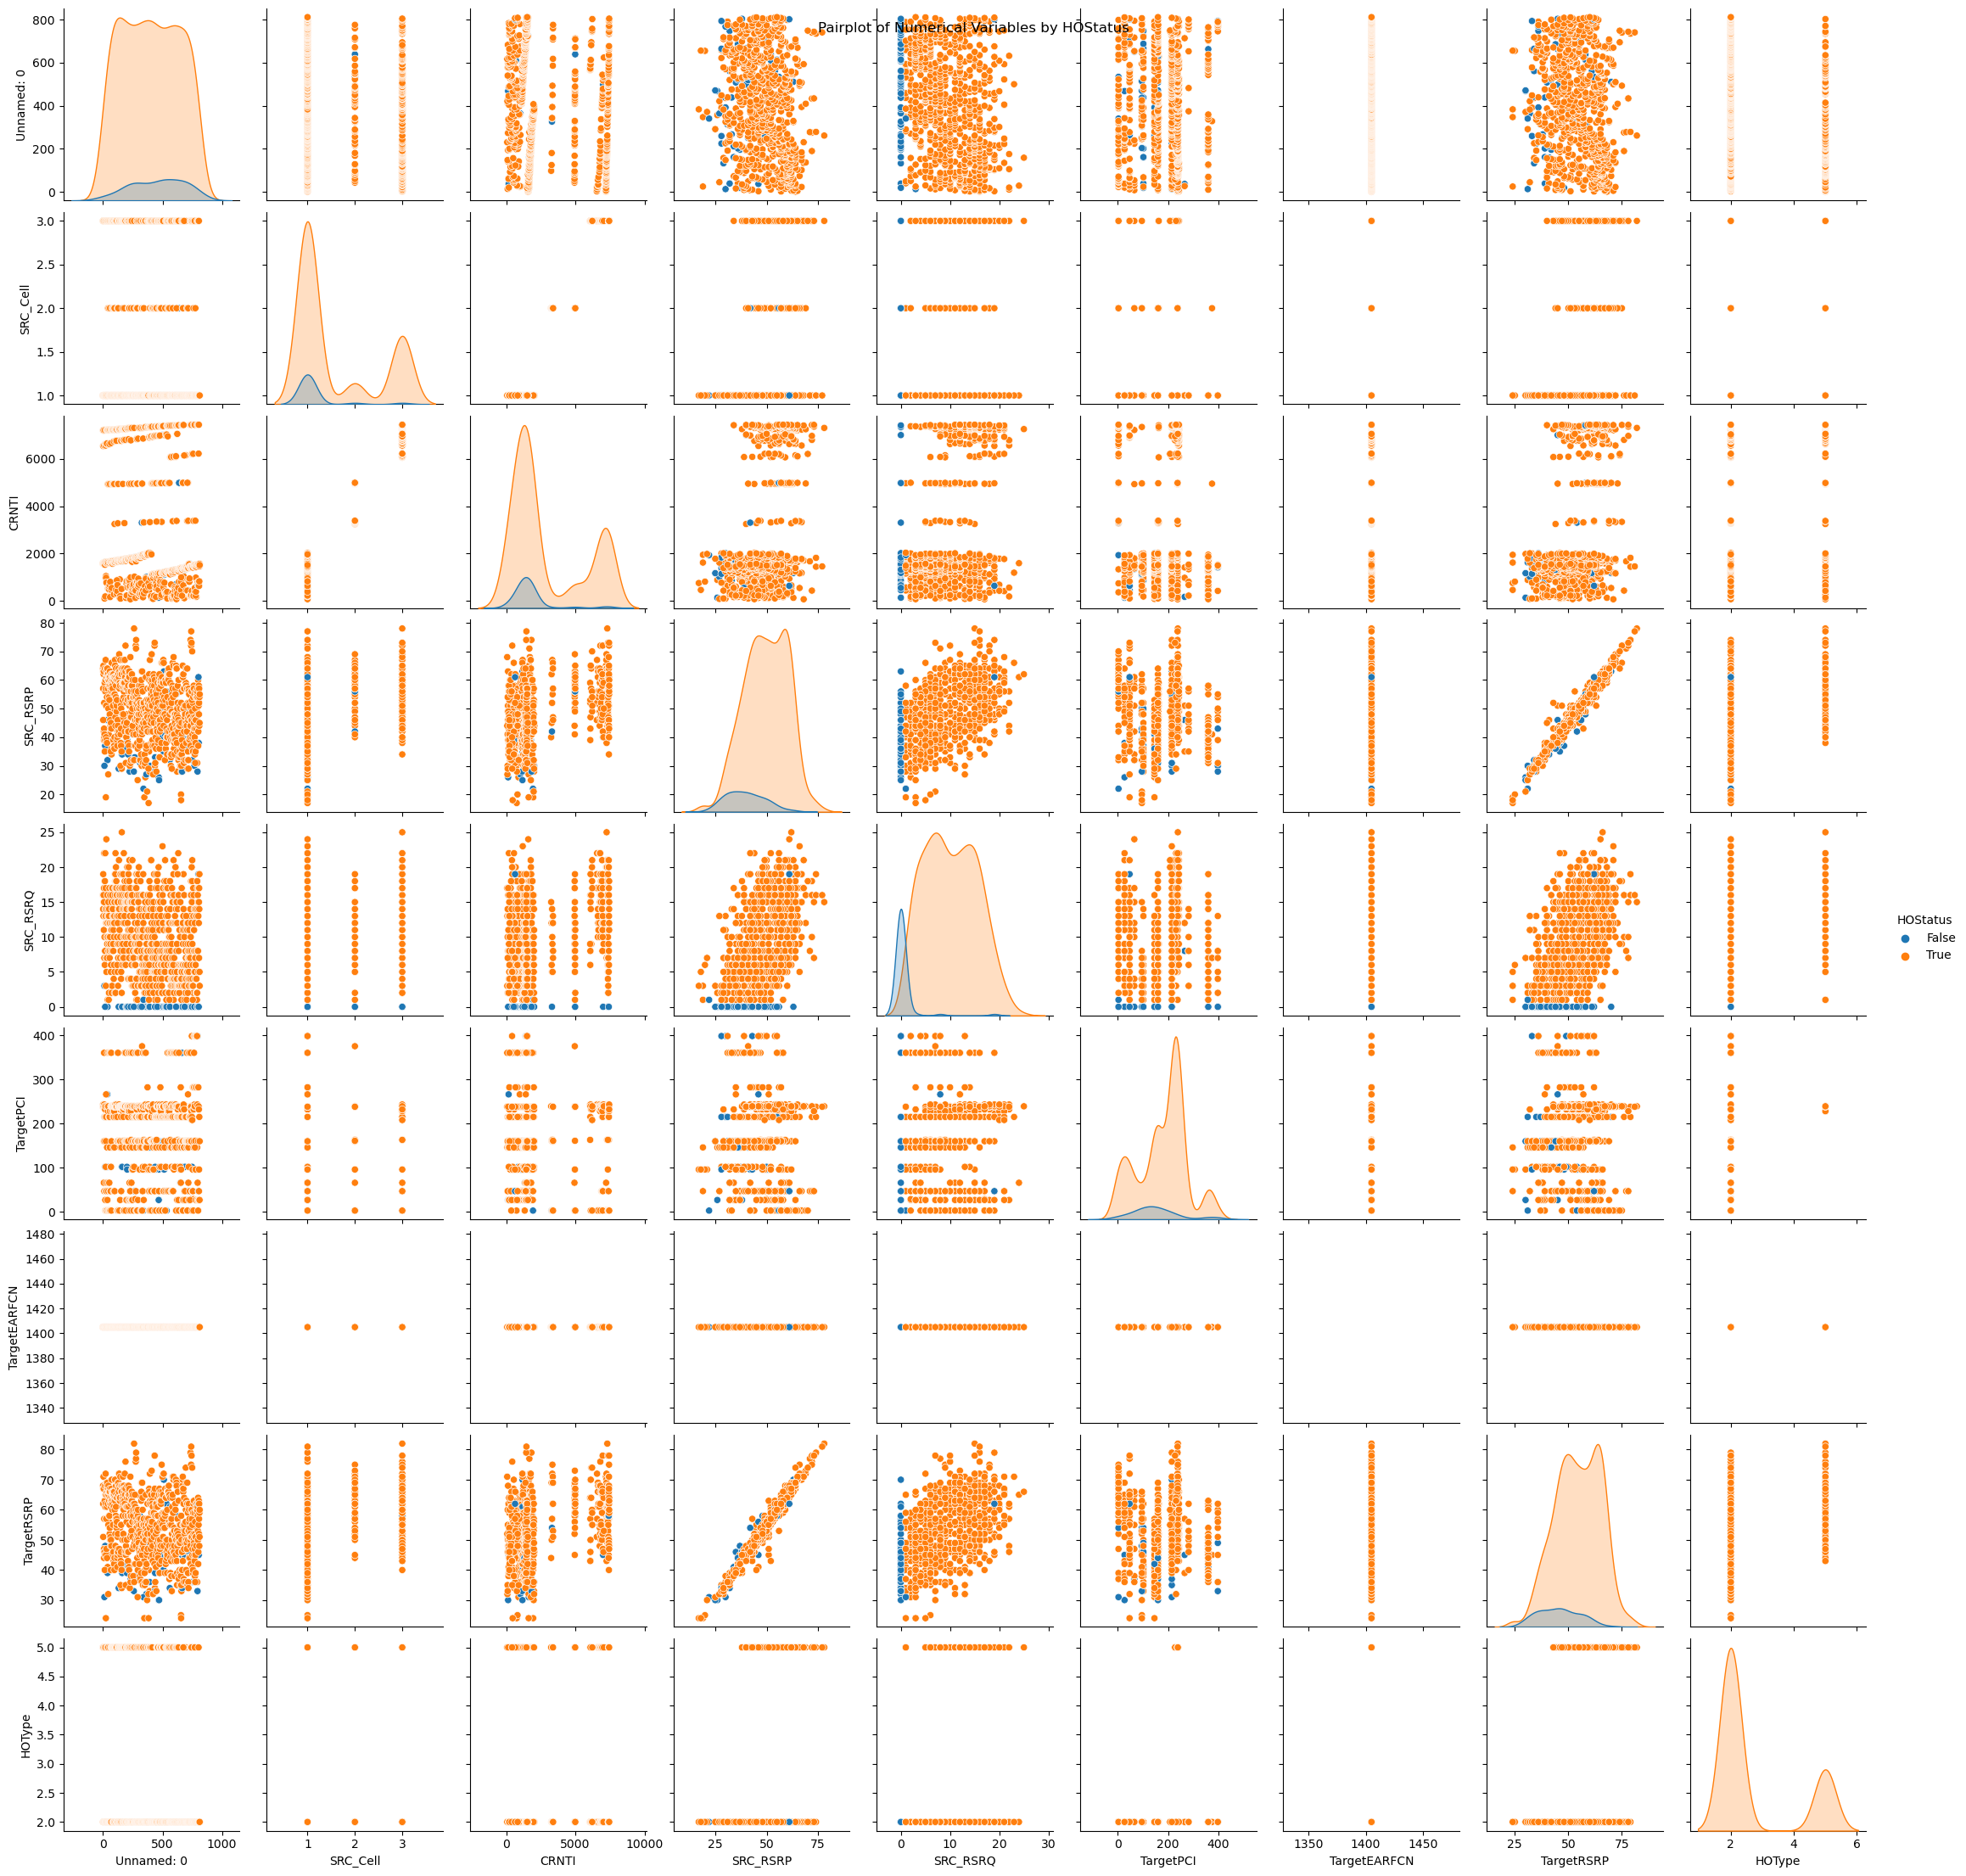

In [43]:
# Relationship between numerical variables and target variable
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue='HOStatus')
plt.suptitle('Pairplot of Numerical Variables by HOStatus')
plt.show()

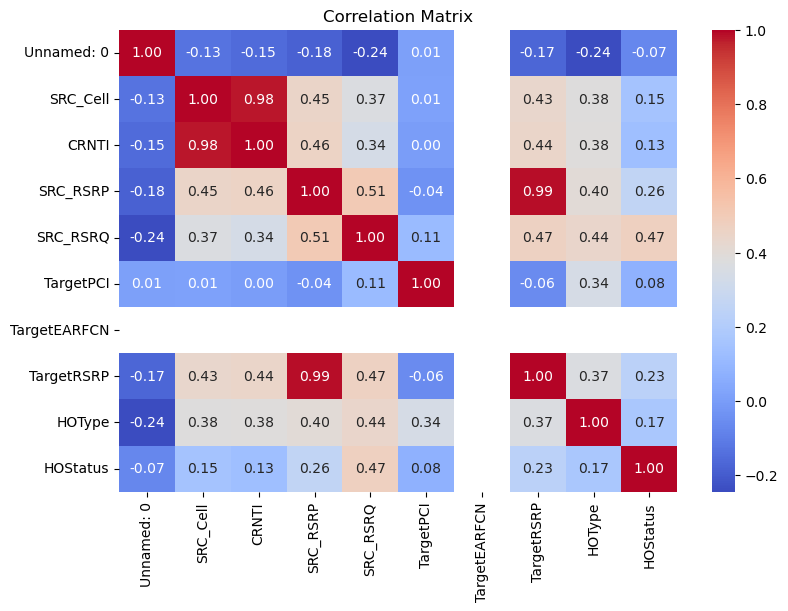

In [102]:
# Drop the 'Time Stamp' column before calculating the correlation matrix
df = df.drop(columns=['Time Stamp'])


# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [103]:
# Create the new variable DiffRSRP
df['DiffRSRP'] = df['TargetRSRP'] - df['SRC_RSRP']

# Check the updated DataFrame
print(df.head(2))

print(df.columns)

#Final processed data
data = df

   Unnamed: 0  SRC_Cell  CRNTI  SRC_RSRP  SRC_RSRQ  TargetPCI  TargetEARFCN  \
0          36         1    169        46         8        266          1405   
1          38         1   1637        32         0        102          1405   

   TargetRSRP  HOType  HOStatus  DiffRSRP  
0          45       2     False        -1  
1          39       2     False         7  
Index(['Unnamed: 0', 'SRC_Cell', 'CRNTI', 'SRC_RSRP', 'SRC_RSRQ', 'TargetPCI',
       'TargetEARFCN', 'TargetRSRP', 'HOType', 'HOStatus', 'DiffRSRP'],
      dtype='object')


### Logistic Regression

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#data = pd.read_excel('TrainSite2147.xlsx')

# Split the data into features (X) and target variable (y)
X = data[['SRC_RSRP', 'SRC_RSRQ', 'TargetRSRP', 'DiffRSRP']]
y = data['HOStatus']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9480122324159022
              precision    recall  f1-score   support

       False       1.00      0.14      0.24        59
        True       0.95      1.00      0.97       922

    accuracy                           0.95       981
   macro avg       0.97      0.57      0.61       981
weighted avg       0.95      0.95      0.93       981



### Validate on unseen data

In [27]:
# Load the new data from the Excel file
#new_data = pd.read_excel('Validate7815.xlsx')

fileName = 'Validate7815.xlsx'
new_data = pd.read_excel(fileName)

# Create the new variable DiffRSRP
new_data['DiffRSRP'] = new_data['TargetRSRP'] - new_data['SRC_RSRP']

# Assuming 'new_data' has the same columns as the training data: CRNTI, SRC_RSRP, SRC_RSRQ, TargetRSRP, HOType
# Preprocess the features using the same StandardScaler instance as in the training
X_new = new_data[['SRC_RSRP', 'SRC_RSRQ', 'TargetRSRP', 'DiffRSRP']]

# Make predictions on the new data
y_pred_new = logreg.predict(X_new)

# Print the predicted HOStatus
print("Predicted HOStatus for new data:")
#print(y_pred_new)

# Append the predicted values to the original DataFrame
new_data['PredictedHOStatus'] = y_pred_new

# Step 1: Calculate the total number of rows
total_rows = len(new_data)

# Step 2: Calculate the number of matching rows
matching_count = (new_data['HOStatus'] == new_data['PredictedHOStatus']).sum()

# Step 3: Calculate the percentage of matching rows against the total
percentage_matching = (matching_count / total_rows) * 100

print("Total rows in DataFrame:", total_rows)
print("Number of matching rows:", matching_count)
print("Percentage of matching rows:", percentage_matching)

# Save the DataFrame back to the XLSX file
new_data.to_excel('Output/Predicted_7815.xlsx', index=False)

print("Predicted HOStatus appended to the original XLSX sheet.")


c:\Users\luser\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Predicted HOStatus for new data:
Total rows in DataFrame: 759
Number of matching rows: 744
Percentage of matching rows: 98.02371541501977
Predicted HOStatus appended to the original XLSX sheet.


In [28]:
# Load the new data from the Excel file
#new_data = pd.read_excel('TrainSite6776.xlsx')

fileName = 'TrainSite6776.xlsx'
new_data = pd.read_excel(fileName)

# Create the new variable DiffRSRP
new_data['DiffRSRP'] = new_data['TargetRSRP'] - new_data['SRC_RSRP']


# Assuming 'new_data' has the same columns as the training data: CRNTI, SRC_RSRP, SRC_RSRQ, TargetRSRP, HOType

# Preprocess the features using the same StandardScaler instance as in the training
X_new = new_data[['SRC_RSRP', 'SRC_RSRQ', 'TargetRSRP', 'DiffRSRP']]

# Make predictions on the new data
y_pred_new = logreg.predict(X_new)

# Print the predicted HOStatus
print("Predicted HOStatus for new data:")

# Append the predicted values to the original DataFrame
new_data['PredictedHOStatus'] = y_pred_new

# Step 1: Calculate the total number of rows
total_rows = len(new_data)

# Step 2: Calculate the number of matching rows
matching_count = (new_data['HOStatus'] == new_data['PredictedHOStatus']).sum()

# Step 3: Calculate the percentage of matching rows against the total
percentage_matching = (matching_count / total_rows) * 100

print("Total rows in DataFrame:", total_rows)
print("Number of matching rows:", matching_count)
print("Percentage of matching rows:", percentage_matching)

# Save the DataFrame back to the XLSX file
new_data.to_excel('Output/Pred{}'.format(fileName), index=False)

print("Predicted HOStatus appended to the original XLSX sheet.")


c:\Users\luser\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Predicted HOStatus for new data:
Total rows in DataFrame: 875
Number of matching rows: 790
Percentage of matching rows: 90.28571428571428
Predicted HOStatus appended to the original XLSX sheet.


# TensorFlow

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


fileName = 'TrainSite6776.xlsx'
new_data = pd.read_excel(fileName)


# Create the new variable DiffRSRP
new_data['DiffRSRP'] = new_data['TargetRSRP'] - new_data['SRC_RSRP']

# Split the data into features (X) and target variable (y)
X = data[['SRC_RSRP', 'SRC_RSRQ', 'TargetRSRP', 'DiffRSRP']]
y = data['HOStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Make predictions on the testing set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)



fileName = 'TrainSite6776.xlsx'
new_data = pd.read_excel(fileName)


# Create the new variable DiffRSRP
new_data['DiffRSRP'] = new_data['TargetRSRP'] - new_data['SRC_RSRP']

# Assuming 'new_data' has the same columns as the training data: CRNTI, SRC_RSRP, SRC_RSRQ, TargetRSRP, HOType
# Preprocess the features using the same StandardScaler instance as in the training
X_new = new_data[['SRC_RSRP', 'SRC_RSRQ', 'TargetRSRP', 'DiffRSRP']]

# Make predictions on the testing set
y_pred_new = model.predict(X_new)
#y_pred = (y_pred_new > 0.5).astype(int)


# Print the predicted HOStatus
print("Predicted HOStatus for new data:")

# Append the predicted values to the original DataFrame
new_data['PredictedHOStatus'] = y_pred_new

# Step 1: Calculate the total number of rows
total_rows = len(new_data)

# Step 2: Calculate the number of matching rows
matching_count = (new_data['HOStatus'] == new_data['PredictedHOStatus']).sum()

# Step 3: Calculate the percentage of matching rows against the total
percentage_matching = (matching_count / total_rows) * 100

print("Total rows in DataFrame:", total_rows)
print("Number of matching rows:", matching_count)
print("Percentage of matching rows:", percentage_matching)

# Save the DataFrame back to the XLSX file
new_data.to_excel('Output/Pred{}'.format(fileName), index=False)

print("Predicted HOStatus appended to the original XLSX sheet.")





(650, 4)
(163, 4)
Epoch 1/20


c:\Users\luser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\luser\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9388 - loss: 0.8039

c:\Users\luser\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9358 - loss: 0.7723 - val_accuracy: 0.8769 - val_loss: 0.4149
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9155 - loss: 0.6715 - val_accuracy: 0.8769 - val_loss: 0.4899
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9058 - loss: 0.4837 - val_accuracy: 0.8769 - val_loss: 0.2873
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9234 - loss: 0.3962 - val_accuracy: 0.8769 - val_loss: 0.2781
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9248 - loss: 0.2124 - val_accuracy: 0.8769 - val_loss: 0.2282
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9303 - loss: 0.2279 - val_accuracy: 0.8769 - val_loss: 0.1260
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9146 - loss: 0.2356 - val_accuracy: 0.8769 - val_loss: 0.1996
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9304 - loss: 0.2116 - val_accuracy: 0.8769 - val_loss: 0.1084
Ep

c:\Users\luser\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\luser\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Accuracy: 0.8957055214723927
Precision: 0.8957055214723927
Recall: 1.0
F1 Score: 0.9449838187702265
ROC AUC Score: 0.5
Confusion Matrix:
 [[  0  17]
 [  0 146]]
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted HOStatus for new data:
Total rows in DataFrame: 875
Number of matching rows: 790
Percentage of matching rows: 90.28571428571428
Predicted HOStatus appended to the original XLSX sheet.


## Random Forest 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9678899082568807
Precision: 0.9708588957055214
Recall: 0.9968503937007874
F1 Score: 0.9836829836829837
ROC AUC Score: 0.4984251968503937
Confusion Matrix:
 [[  0  19]
 [  2 633]]


### GridSearch CV

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


fileName = 'TrainSite6776.xlsx'
new_data = pd.read_excel(fileName)

new_data.shape

# Create the new variable DiffRSRP
new_data['DiffRSRP'] = new_data['TargetRSRP'] - new_data['SRC_RSRP']

# Split the data into features (X) and target variable (y)
X = data[['SRC_RSRP', 'SRC_RSRQ', 'TargetRSRP', 'DiffRSRP']]
y = data['HOStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(X_test.shape)

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define parameter grids for each classifier
param_grids = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10]},
    'Decision Tree': {'classifier__max_depth': [None, 5, 10]},
    'Random Forest': {'classifier__n_estimators': [100, 200, 300]},
    'Gradient Boosting': {'classifier__n_estimators': [100, 200, 300],
                          'classifier__learning_rate': [0.05, 0.1, 0.2]}
}

# Perform grid search with cross-validation for each classifier
results = {}
for name, classifier in classifiers.items():
    # Create a pipeline with standard scaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Store the results
    results[name] = {
        'Best Parameters': grid_search.best_params_,
        'Best Score': grid_search.best_score_
    }

# Display the results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Best Score: {result['Best Score']}")
    print()


(2613, 4)
(654, 4)
Classifier: Logistic Regression
Best Parameters: {'classifier__C': 10}
Best Score: 0.9483366665934081

Classifier: Decision Tree
Best Parameters: {'classifier__max_depth': 5}
Best Score: 0.9743536772085595

Classifier: Random Forest
Best Parameters: {'classifier__n_estimators': 100}
Best Score: 0.9716738826252902

Classifier: Gradient Boosting
Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 200}
Best Score: 0.9743573401317187

